In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import pearsonr

In [7]:
df=pd.read_csv('data/salcap_and_salary.csv')
df.drop(columns = ['Lg', 'season_start', 'season_end', 'Tm'], inplace=True)
df=df.sort_values('player_id').dropna()

First I wanted to separate the data by players.

In [12]:
pg_salary = df.query('Pos == "PG"')['clean_Salary']
sg_salary = df.query('Pos == "SG"')['clean_Salary']
sf_salary = df.query('Pos == "SF"')['clean_Salary']
pf_salary = df.query('Pos == "PF"')['clean_Salary']
c_salary = df.query('Pos == "C"')['clean_Salary']

pg_cap = df.query('Pos == "PG"')['%_of_cap']
sg_cap = df.query('Pos == "SG"')['%_of_cap']
sf_cap = df.query('Pos == "SF"')['%_of_cap']
pf_cap = df.query('Pos == "PF"')['%_of_cap']
c_cap = df.query('Pos == "C"')['%_of_cap']

In [13]:
df_prep = df[['Age', 'G', 'MP', 'PER', 'TS%', '3PAr', 'FTr', 
              'ORB%','DRB%', 'TRB%', 'AST%', 'STL%', 'BLK%', 
              'TOV%', 'USG%', 'OWS', 'DWS','WS', 'WS/48', 'OBPM', 
              'DBPM', 'BPM']]
columns = list(df_prep)

for i in columns:
    df[i]

In [14]:
#stats as arrays
cap = np.array(df['%_of_cap'])
usg = np.array(df['USG%'])
ts = np.array(df['TS%'])
age = np.array(df['Age'])
g = np.array(df['G'])
mp = np.array(df['MP'])
per = np.array(df['PER'])
par3 = np.array(df['3PAr'])
ftr = np.array(df['FTr'])
orb = np.array(df['ORB%'])
drb = np.array(df['DRB%'])
trb = np.array(df['TRB%'])
ast = np.array(df['TRB%'])
stl = np.array(df['STL%'])
blk = np.array(df['BLK%'])
tov = np.array(df['TOV%'])
ows = np.array(df['OWS'])
dws = np.array(df['DWS'])
ws = np.array(df['WS'])
ws48 = np.array(df['WS/48'])
obpm = np.array(df['OBPM'])
dbpm = np.array(df['DBPM'])
bpm = np.array(df['BPM'])

In [15]:
#Null Hypothesis: The distribution of salary among positions is similar
#Alternative Hypothesis: The distribution of salary among positions is not similar
stats, p = stats.kruskal(pg_cap, sg_cap, sf_cap, pf_cap, c_cap)

print(p)

if p < 0.05:
    print('Null hypothesis rejected. The distribution of salary among positions is not similar')
else:
    print('Null hypothesis is not rejected. The distribution of salary among positions is similiar')


6.0901806122179445e-15
Null hypothesis rejected. The distribution of salary among positions is not similar


In [16]:
#Define function for p-value for statistics

#Null Hypothesis: The 2 samples are independent.
#Alternative Hypothesis: There is a dependency between the samples.

def pearson_r(x):
    corr, p_stat = pearsonr(cap, x)
    _ = sns.jointplot(cap, x, kind="reg")
    print ('p-val for = ', p_stat )
    if p_stat < 0.05:
        print('Null Hypothesis rejected. There is a dependency between the samples')
    else:
        print('Null hypothesis is not rejected. The 2 samples are independent')
    print('Correlation Coefficient = ', corr)
    return 

p-val for =  9.245499032350748e-179
Null Hypothesis rejected. There is a dependency between the samples
Correlation Coefficient =  0.28071769631445825


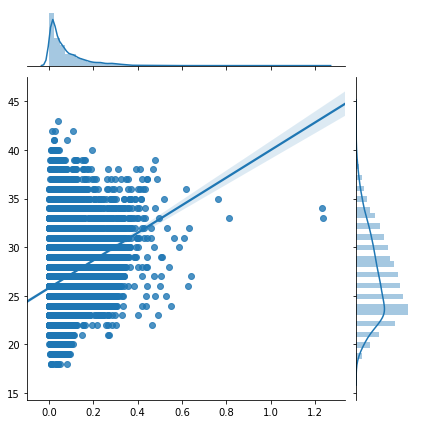

In [33]:
#Percent against Cap vs Age
pearson_r(age)

p-val for =  1.1569436671380743e-178
Null Hypothesis rejected. There is a dependency between the samples
Correlation Coefficient =  0.280643461127591


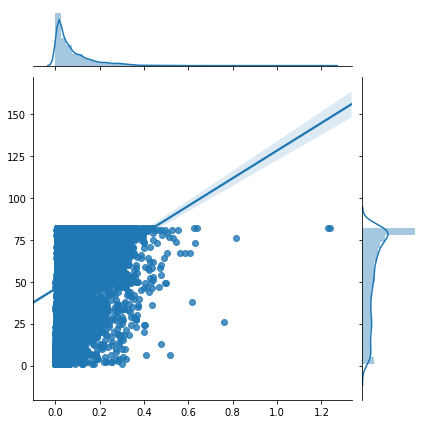

In [34]:
#Percent against Cap vs Games
pearson_r(g)

p-val for =  0.0
Null Hypothesis rejected. There is a dependency between the samples
Correlation Coefficient =  0.4888638194632478


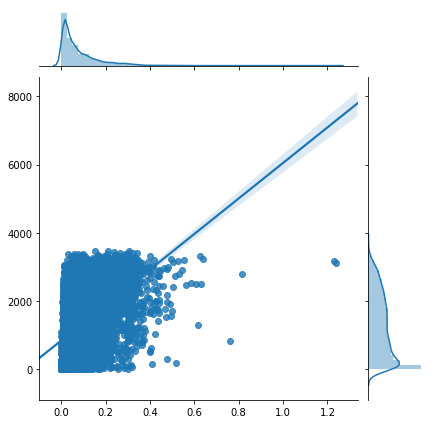

In [35]:
#Percent against Cap vs Minutes Played
pearson_r(mp)

p-val for =  1.4439027659757456e-254
Null Hypothesis rejected. There is a dependency between the samples
Correlation Coefficient =  0.33269137661162745


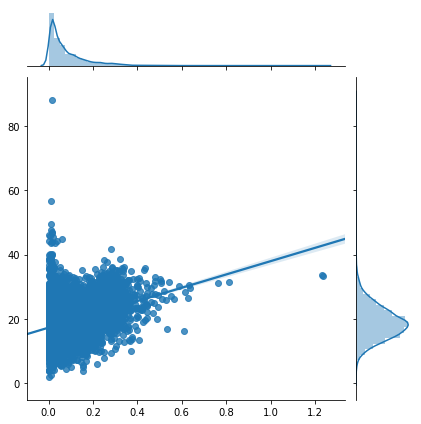

In [36]:
#Percent against Cap vs Usage %
pearson_r(usg)

p-val for =  1.1730645936091421e-79
Null Hypothesis rejected. There is a dependency between the samples
Correlation Coefficient =  0.18822296642089326


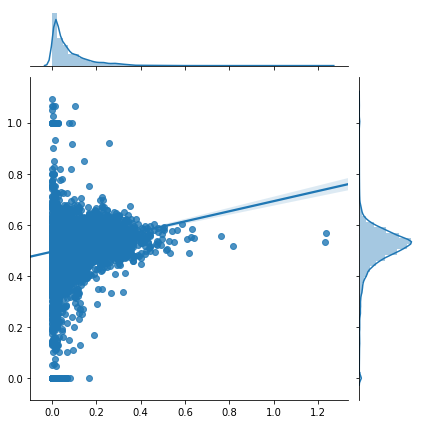

In [37]:
#Percent against Cap vs True Shooting %
pearson_r(ts)

p-val for =  0.0
Null Hypothesis rejected. There is a dependency between the samples
Correlation Coefficient =  0.4141098968262765


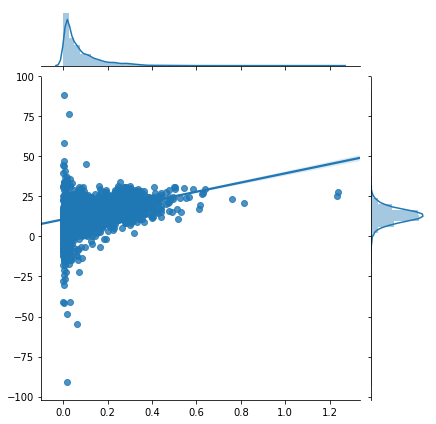

In [38]:
#Percent against Cap vs Player Efficiency Rating
pearson_r(per)

p-val for =  8.509795780078734e-19
Null Hypothesis rejected. There is a dependency between the samples
Correlation Coefficient =  -0.08879479184481216


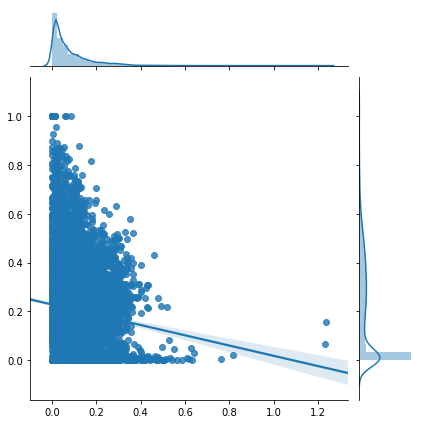

In [39]:
#Percent against Cap vs 3-Point Attempt Rate
pearson_r(par3)

p-val for =  3.272321657606149e-10
Null Hypothesis rejected. There is a dependency between the samples
Correlation Coefficient =  0.06310185249954682


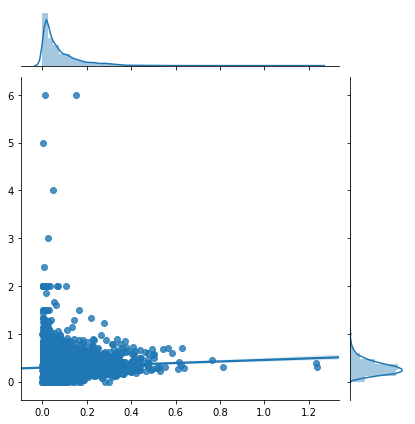

In [40]:
#Percent against Cap vs Free Throw Attempt Rate
pearson_r(ftr)

p-val for =  0.910646148354989
Null hypothesis is not rejected. The 2 samples are independent
Correlation Coefficient =  0.0011278034278399008


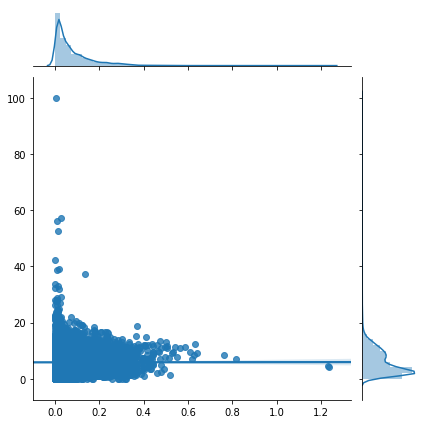

In [41]:
#Percent against Cap vs Offensive Rebound Percentage
pearson_r(orb)

p-val for =  4.501788179323692e-81
Null Hypothesis rejected. There is a dependency between the samples
Correlation Coefficient =  0.1898977292011233


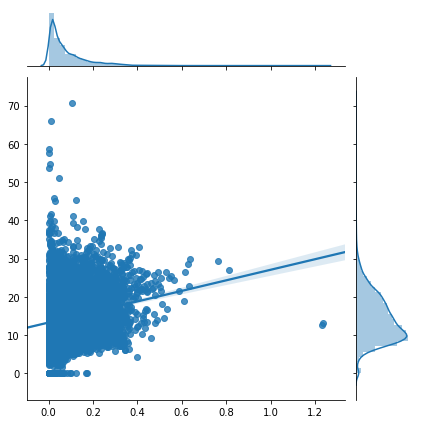

In [42]:
#Percent against Cap vs Defensive Rebound Percentage
pearson_r(drb)

p-val for =  7.811740004586536e-37
Null Hypothesis rejected. There is a dependency between the samples
Correlation Coefficient =  0.126895583918155


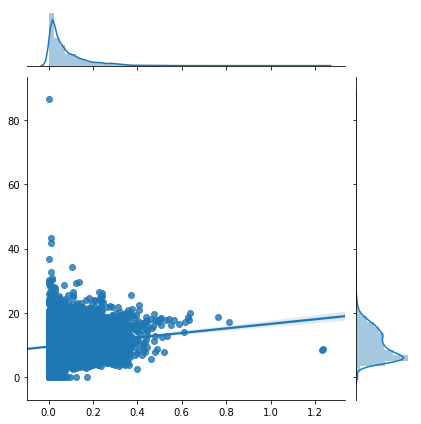

In [43]:
#Percent against Cap vs Total Rebound Percentage
pearson_r(trb)

p-val for =  0.0
Null Hypothesis rejected. There is a dependency between the samples
Correlation Coefficient =  0.49219568031722866


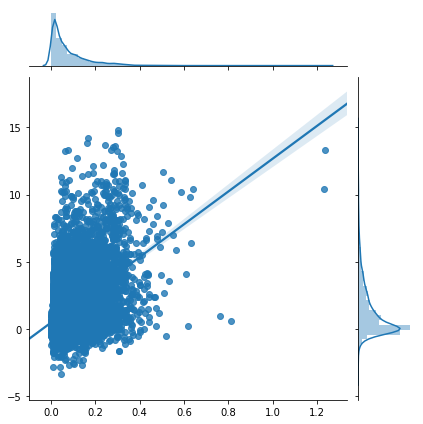

In [44]:
#Percent against Cap vs Offensive Win Shares
pearson_r(ows)

p-val for =  0.0
Null Hypothesis rejected. There is a dependency between the samples
Correlation Coefficient =  0.49490861048424584


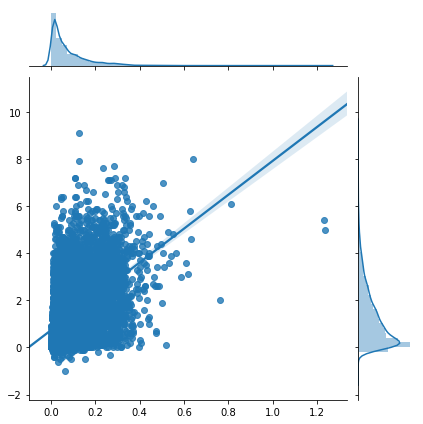

In [45]:
#Percent against Cap vs Defensive Win Shares
pearson_r(dws)

p-val for =  0.0
Null Hypothesis rejected. There is a dependency between the samples
Correlation Coefficient =  0.5427574399072819


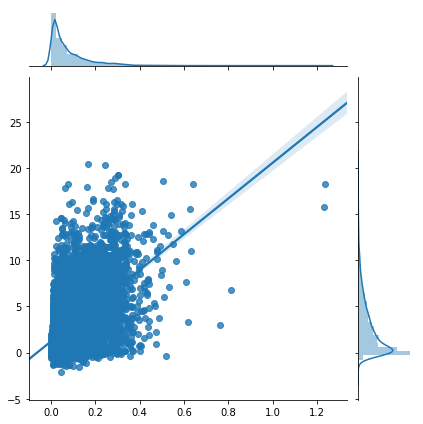

In [46]:
#Percent against Cap vs Win Shares
pearson_r(ws)

p-val for =  1.9343654442518402e-204
Null Hypothesis rejected. There is a dependency between the samples
Correlation Coefficient =  0.2995443142110066


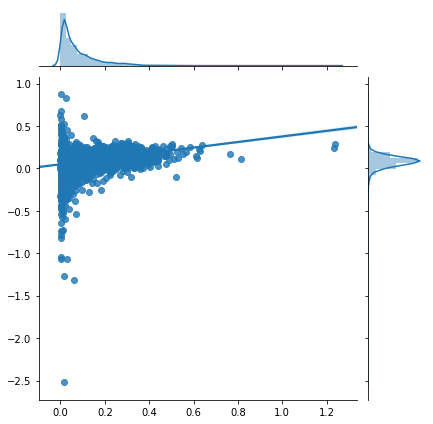

In [47]:
#Percent against Cap vs Win Shares per 48 minutes
pearson_r(ws48)

p-val for =  6.8408812824336905e-295
Null Hypothesis rejected. There is a dependency between the samples
Correlation Coefficient =  0.35664271752329746


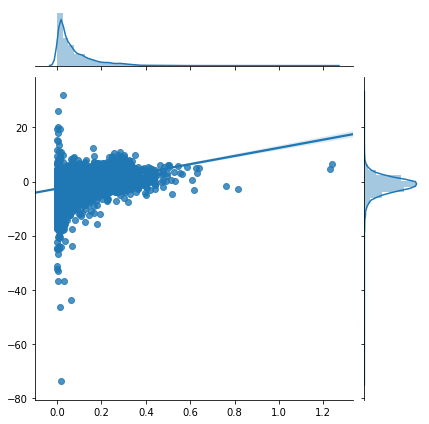

In [48]:
#Percent against Cap vs Offensive Box Plus/Minus
pearson_r(obpm)

p-val for =  6.42585374861203e-97
Null Hypothesis rejected. There is a dependency between the samples
Correlation Coefficient =  0.20765697914077313


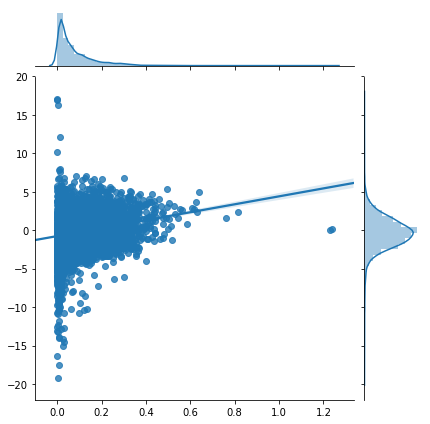

In [49]:
#Percent against Cap vs Defensive Box Plus/Minus
pearson_r(dbpm)

p-val for =  0.0
Null Hypothesis rejected. There is a dependency between the samples
Correlation Coefficient =  0.39159320362763606


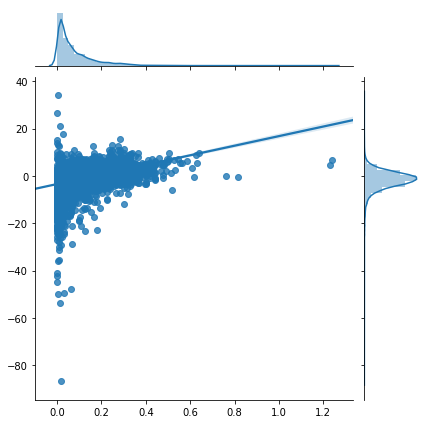

In [50]:
#Percent against Cap vs Box Plus/Minus
pearson_r(bpm)